# **Installing & Importing Libraries**

In [ ]:
!pip install vecstack

In [ ]:
# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#to split Dataset
from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb

#R
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#Ensemble
from imblearn.metrics import geometric_mean_score
import re
import sklearn
from sklearn.model_selection import StratifiedKFold
import os
from vecstack import stacking
from sklearn.calibration import CalibratedClassifierCV

from scipy import stats

import warnings
warnings.filterwarnings('ignore')


# **Loading & Renaming Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
dt = pd.read_csv('FINAL_DATASET.csv')

In [ ]:
dt.head()

age  sex  chest pain type  ...  oldpeak  ST slope  target
0   40    1                2  ...      0.0         1       0
1   49    0                3  ...      1.0         2       1
2   37    1                2  ...      0.0         1       0
3   48    0                4  ...      1.5         2       1
4   54    1                3  ...      0.0         1       0

[5 rows x 12 columns]

In [ ]:
dt.tail()

age  sex  chest pain type  ...  oldpeak  ST slope  target
1185   45    1                1  ...      1.2         2       1
1186   68    1                4  ...      3.4         2       1
1187   57    1                4  ...      1.2         2       1
1188   57    0                2  ...      0.0         2       1
1189   38    1                3  ...      0.0         1       0

[5 rows x 12 columns]

## Renaming

In [ ]:
dt.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [ ]:
# renaming
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [ ]:
dt

age  sex  chest_pain_type  ...  st_depression  st_slope  target
0      40    1                2  ...            0.0         1       0
1      49    0                3  ...            1.0         2       1
2      37    1                2  ...            0.0         1       0
3      48    0                4  ...            1.5         2       1
4      54    1                3  ...            0.0         1       0
...   ...  ...              ...  ...            ...       ...     ...
1185   45    1                1  ...            1.2         2       1
1186   68    1                4  ...            3.4         2       1
1187   57    1                4  ...            1.2         2       1
1188   57    0                2  ...            0.0         2       1
1189   38    1                3  ...            0.0         1       0

[1190 rows x 12 columns]

# **Profile report**

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 5.0 MB/s 
     |████████████████████████████████| 3.1 MB 38.7 MB/s 
     |████████████████████████████████| 675 kB 60.4 MB/s 
     |████████████████████████████████| 58 kB 4.8 MB/s 
     |████████████████████████████████| 812 kB 57.2 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ef692d91db66afb3b9b17a9c4150976bc6d879f8a1d02143fe0ab09718785b2e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=1e5087b1ab426ac285e1427872fc696e6973698866297094d25372f03b9468d6
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(dt)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Correlation among the attributes**

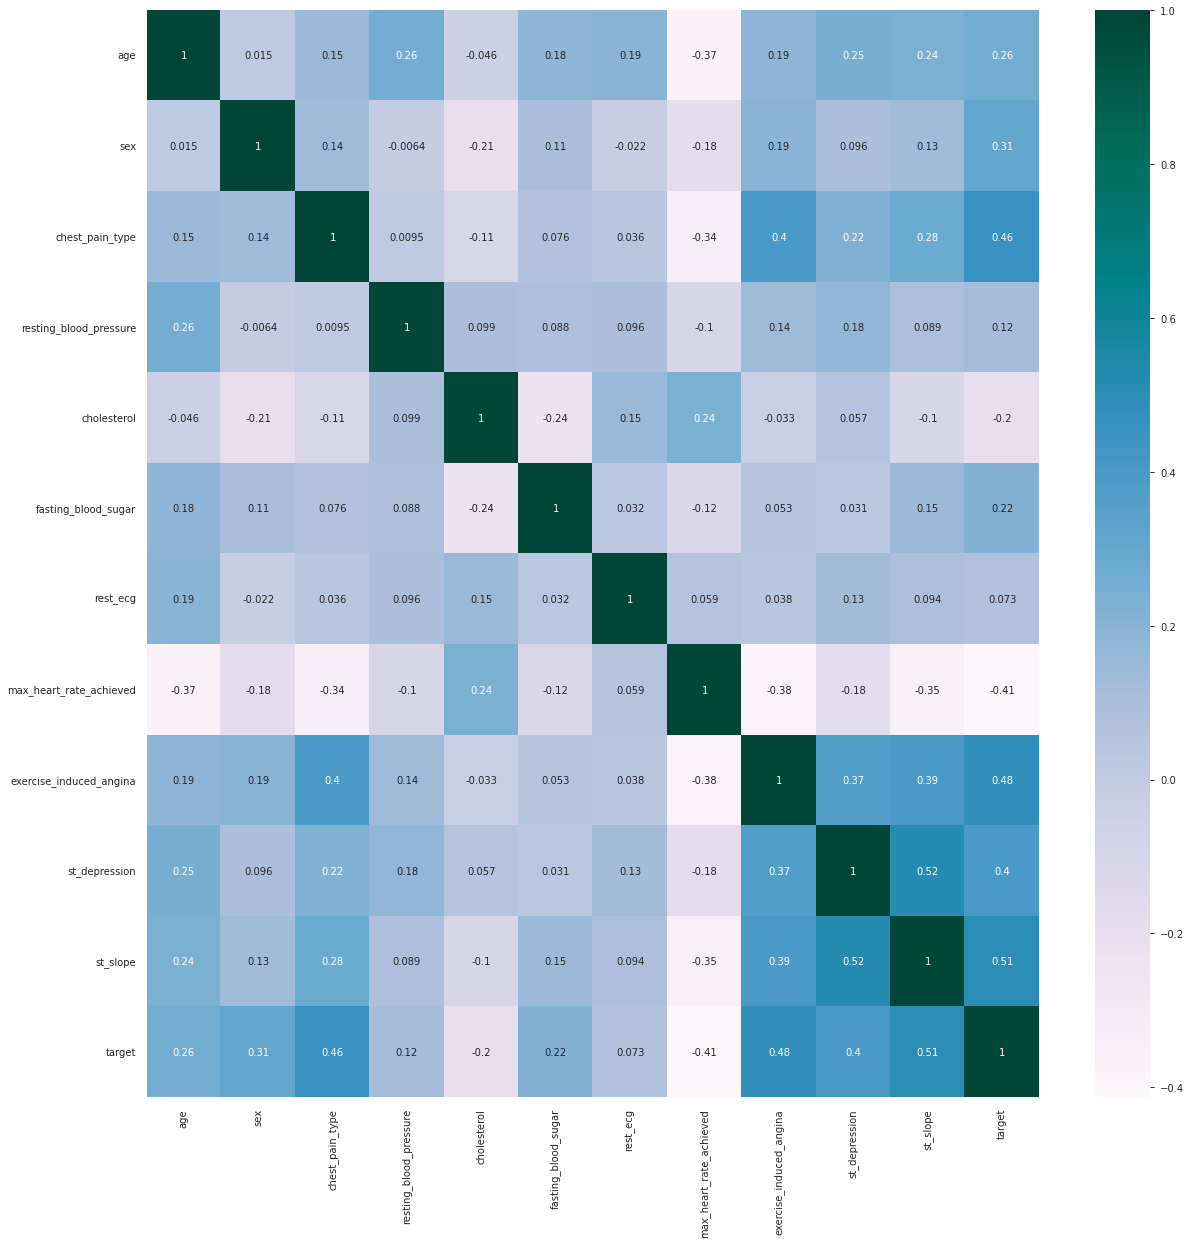

In [ ]:
#get correlations of each features in dataset
corrmat = dt.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dt[top_corr_features].corr(),annot=True,cmap="PuBuGn")
#RdYlGn

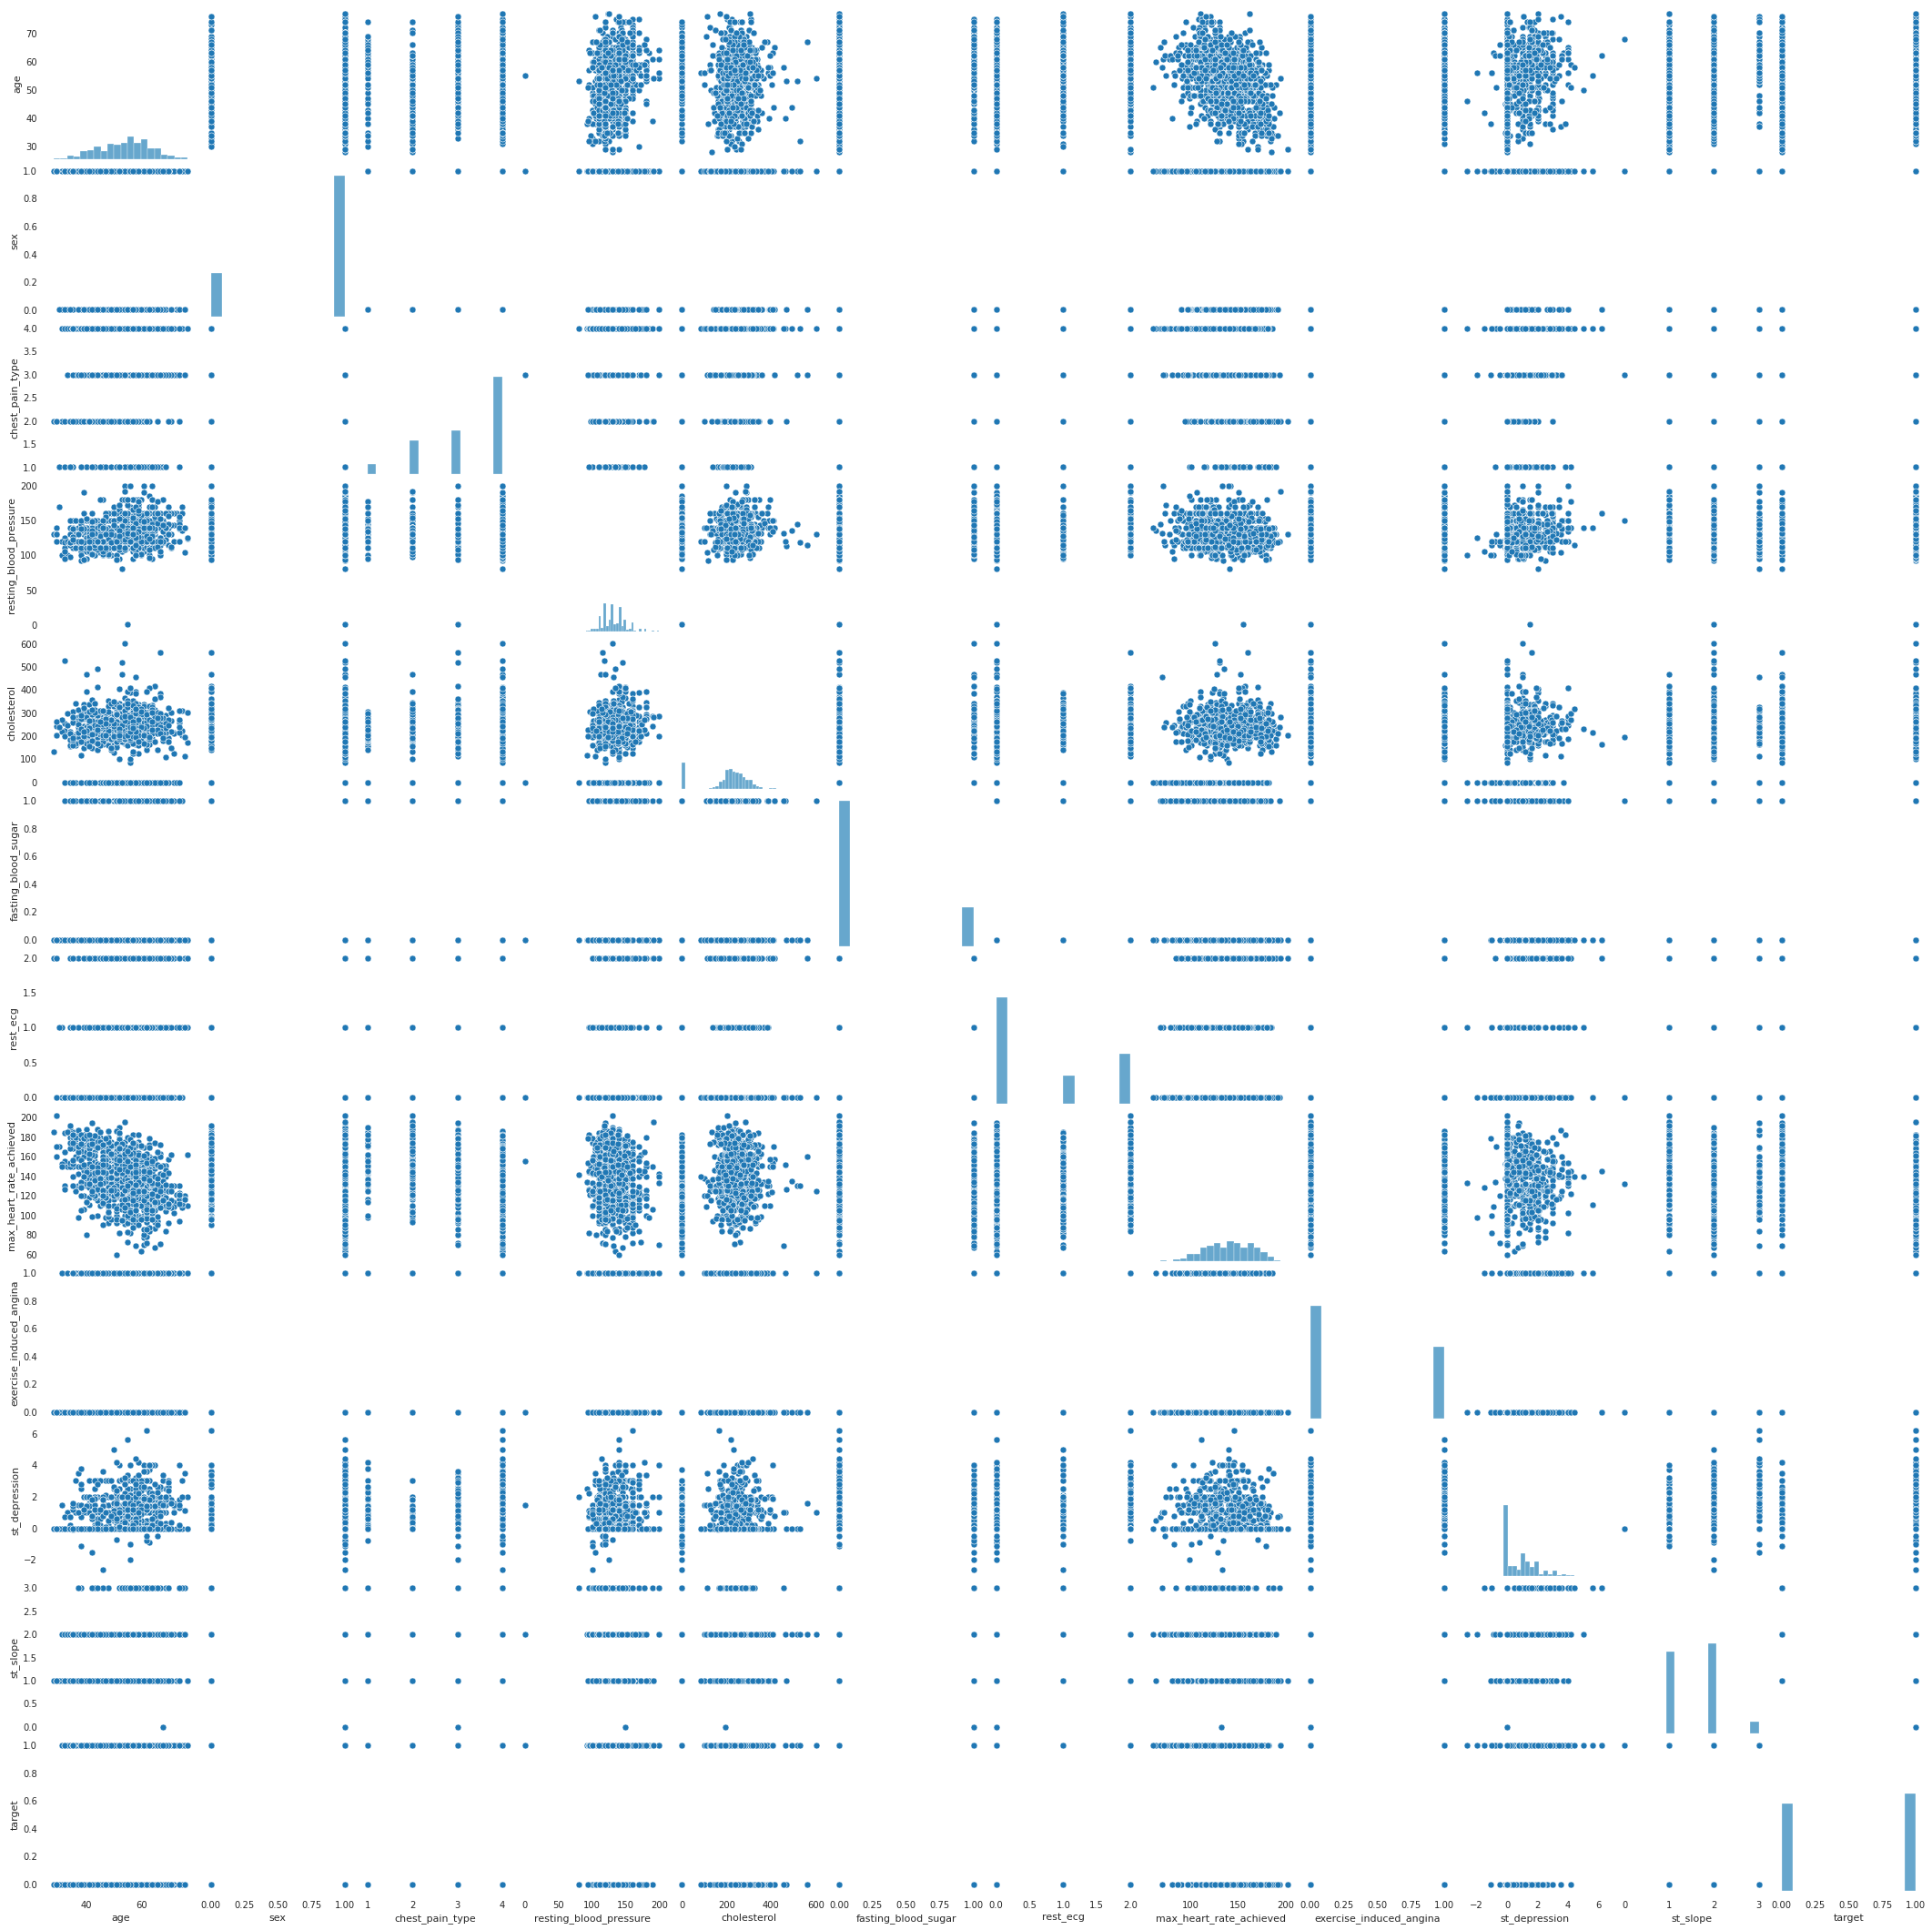

In [ ]:
sns.pairplot(data=dt)

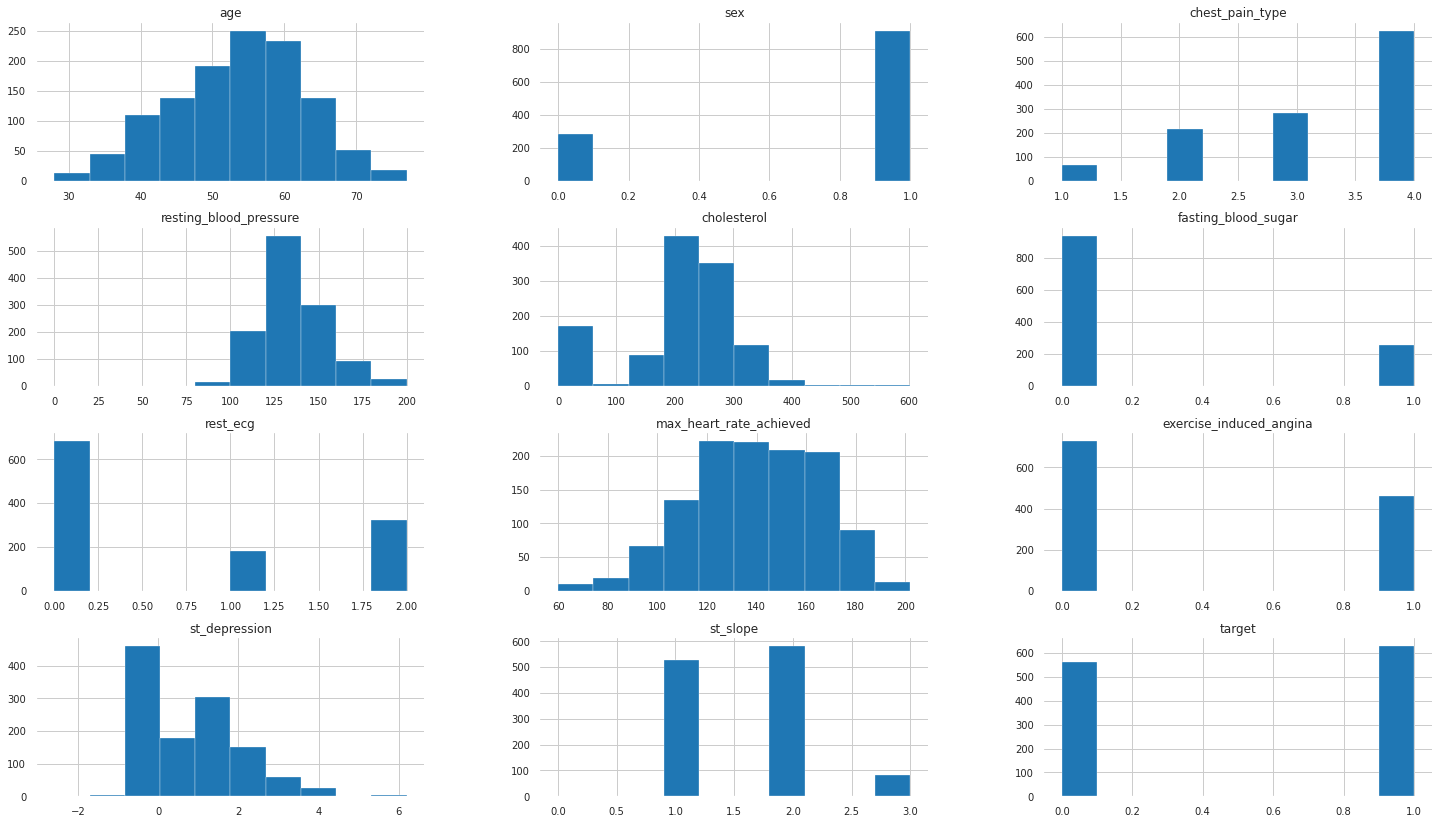

In [ ]:
dt.hist(figsize=(25,18), layout=(5,3));

# **Converting to categorical features & removing Unwanted category**

In [ ]:
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'


dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [ ]:
dt

age     sex   chest_pain_type  ...  st_depression   st_slope  target
0      40    male   atypical angina  ...            0.0  upsloping       0
1      49  female  non-anginal pain  ...            1.0       flat       1
2      37    male   atypical angina  ...            0.0  upsloping       0
3      48  female      asymptomatic  ...            1.5       flat       1
4      54    male  non-anginal pain  ...            0.0  upsloping       0
...   ...     ...               ...  ...            ...        ...     ...
1185   45    male    typical angina  ...            1.2       flat       1
1186   68    male      asymptomatic  ...            3.4       flat       1
1187   57    male      asymptomatic  ...            1.2       flat       1
1188   57  female   atypical angina  ...            0.0       flat       1
1189   38    male  non-anginal pain  ...            0.0  upsloping       0

[1190 rows x 12 columns]

In [ ]:
dt['chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [ ]:
dt['rest_ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

In [ ]:
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [ ]:
#removing row with st_slope =0
dt.drop(dt[dt.st_slope == 0].index, inplace=True)

#checking distribution
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [ ]:
dt

age     sex   chest_pain_type  ...  st_depression   st_slope  target
0      40    male   atypical angina  ...            0.0  upsloping       0
1      49  female  non-anginal pain  ...            1.0       flat       1
2      37    male   atypical angina  ...            0.0  upsloping       0
3      48  female      asymptomatic  ...            1.5       flat       1
4      54    male  non-anginal pain  ...            0.0  upsloping       0
...   ...     ...               ...  ...            ...        ...     ...
1185   45    male    typical angina  ...            1.2       flat       1
1186   68    male      asymptomatic  ...            3.4       flat       1
1187   57    male      asymptomatic  ...            1.2       flat       1
1188   57  female   atypical angina  ...            0.0       flat       1
1189   38    male  non-anginal pain  ...            0.0  upsloping       0

[1189 rows x 12 columns]

# **Summary & statistics of features.**

In [ ]:
# Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1189 non-null   int64  
 1   sex                      1189 non-null   object 
 2   chest_pain_type          1189 non-null   object 
 3   resting_blood_pressure   1189 non-null   int64  
 4   cholesterol              1189 non-null   int64  
 5   fasting_blood_sugar      1189 non-null   int64  
 6   rest_ecg                 1189 non-null   object 
 7   max_heart_rate_achieved  1189 non-null   int64  
 8   exercise_induced_angina  1189 non-null   int64  
 9   st_depression            1189 non-null   float64
 10  st_slope                 1189 non-null   object 
 11  target                   1189 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 120.8+ KB


In [ ]:
dt.shape

(1189, 12)

In [ ]:
#Numerical features
dt.describe(include =[np.number])

age  resting_blood_pressure  ...  st_depression       target
count  1189.000000             1189.000000  ...    1189.000000  1189.000000
mean     53.708158              132.138772  ...       0.923549     0.528175
std       9.352961               18.369251  ...       1.086464     0.499416
min      28.000000                0.000000  ...      -2.600000     0.000000
25%      47.000000              120.000000  ...       0.000000     0.000000
50%      54.000000              130.000000  ...       0.600000     1.000000
75%      60.000000              140.000000  ...       1.600000     1.000000
max      77.000000              200.000000  ...       6.200000     1.000000

[8 rows x 8 columns]

In [ ]:
# Categorical features
dt.describe(include =[np.object])

sex chest_pain_type rest_ecg st_slope
count   1189            1189     1189     1189
unique     2               4        3        3
top     male    asymptomatic   normal     flat
freq     908             625      683      582

# **Data Analysis**

In [ ]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as gobj
#import plotly.figure_factory as ff

## Distribution of Heart disease (target variable)

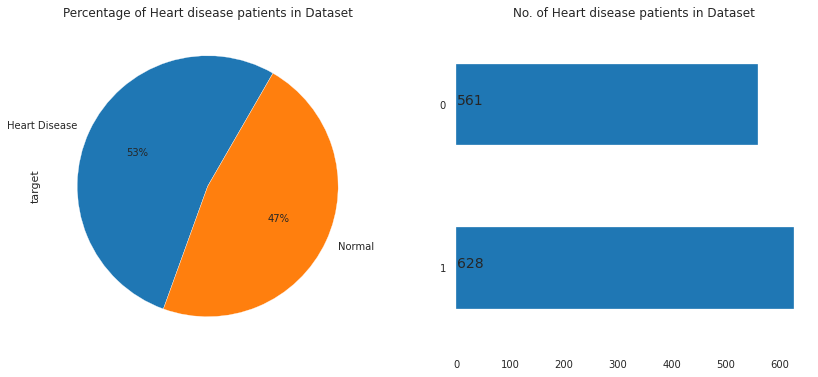

In [ ]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients',
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=14)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

In [ ]:
nor = dt[dt["target"]==0]["age"]
pat = dt[dt["target"]==1]["age"]

fig = go.Figure()
fig.add_trace(go.Histogram(x=nor, nbinsx=58, name="normal"))
fig.add_trace(go.Histogram(x=pat, nbinsx=58, name="patient"))
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()
#being two graphs superimposed, the values ​​of the bars must be added

## Checking Gender & Agewise Distribution

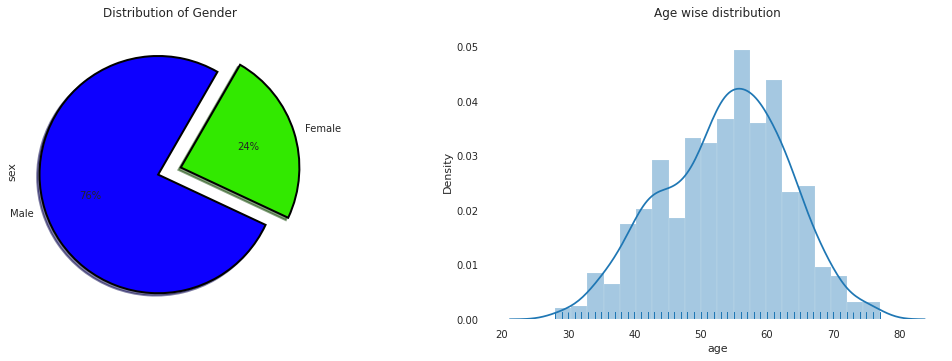

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

In [ ]:
hist_data =[dt["age"].values]
group_labels = ['age']


fig = px.histogram(hist_data, x=dt["age"], marginal="box", hover_data=hist_data, nbins=58,
                   title="Age distribution plot")
fig.show()

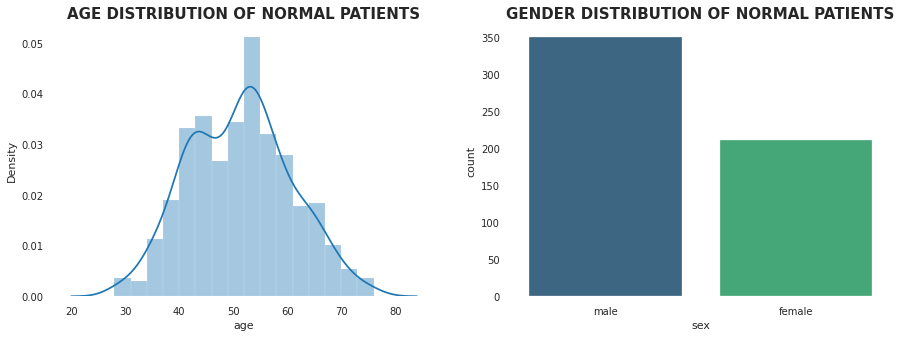

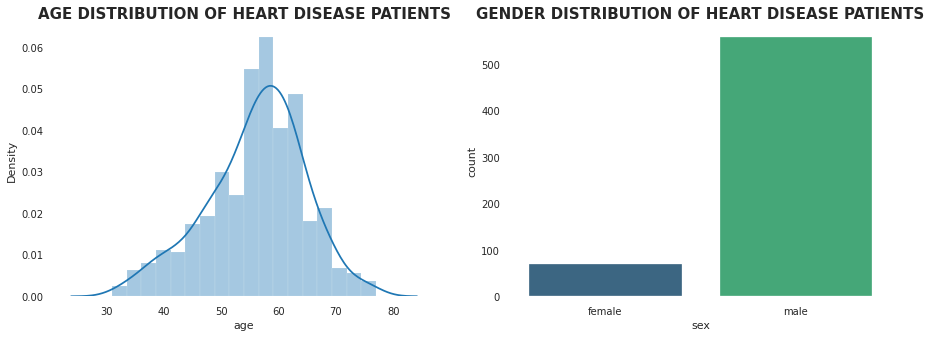

In [ ]:
# creating separate dt for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis' )
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
fig = px.box(dt, y="age", x="sex", color="target", points="all",
                hover_data=dt.columns, title="Analysis in Age and Gender on diseases Status")
fig.show()

## Distribution and Analysis of Diabetes

In [ ]:
fig = px.box(dt, y="age", x="fasting_blood_sugar", color="target", points="all",
             hover_data=dt.columns, title="Analysis in Age and Diabetes on diseases Status")

fig.show()

In [ ]:
diabetes_yes = dt[dt['fasting_blood_sugar']==1]
diabetes_no = dt[dt['fasting_blood_sugar']==0]
x1=len(diabetes_yes)
x2=len(diabetes_no)
hist_data=[x1,x2]
names=['Diabetes Yes', 'Diabetes No']
fig = px.bar(y=hist_data, x=names, title="Analysis on Diabetes")
fig.show()

In [ ]:
fig = px.bar(dt, y='fasting_blood_sugar', x='target', title="Diabetes target Ratio")
fig.show()

In [ ]:
diabetes_yes_patient_no = diabetes_yes[dt["target"]==0]
diabetes_yes_patient_yes = diabetes_yes[dt["target"]==1]
diabetes_no_patient_no = diabetes_no[dt["target"]==0]
diabetes_no_patient_yes = diabetes_no[dt["target"]==1]
x1=len(diabetes_yes_patient_no)
x2=len(diabetes_yes_patient_yes)
x3=len(diabetes_no_patient_no)
x4=len(diabetes_no_patient_yes)
hist_data=[x1,x2,x3,x4]
names=['Diabetes Yes, Heart Patient No', 'Diabetes Yes, Heart Patient Yes', 'Diabetes No, Heart Patient No', 'Diabetes No, Heart Patient Yes']
fig = px.bar(y=hist_data, x=names, title="Analysis on Survival - Diabetes")
fig.show()

## Distribution and Analysis of Exercise Induced Angina

In [ ]:
fig = px.box(dt, y="age", x="exercise_induced_angina", color="target", points="all",
             hover_data=dt.columns, title="Analysis in Age and Exercise Induced Angina on target Status")

fig.show()

In [ ]:

exercise_yes = dt[dt['exercise_induced_angina']==1]
exercise_no = dt[dt['exercise_induced_angina']==0]
x1=len(exercise_yes)
x2=len(exercise_no)
hist_data=[x1,x2]
names=['Exercise Induced Angina Yes', 'Exercise Induced Angina No']
fig = px.bar(y=hist_data, x=names, title="Analysis on Exercise Induced Angina")
fig.show()

In [ ]:
fig = px.bar(dt, y='exercise_induced_angina', x='target', title="Exercise Induced Angina target Ratio")
fig.show()

In [ ]:
exercise_yes_patient_no = exercise_yes[dt["target"]==0]
exercise_yes_patient_yes = exercise_yes[dt["target"]==1]
exercise_no_patient_no = exercise_no[dt["target"]==0]
exercise_no_patient_yes = exercise_no[dt["target"]==1]
x1=len(exercise_yes_patient_no)
x2=len(exercise_yes_patient_yes)
x3=len(exercise_no_patient_no)
x4=len(exercise_no_patient_yes)
hist_data=[x1,x2,x3,x4]
names=['Exercise Induced Angina Yes, Heart Patient No', 'Exercise Induced Angina Yes, Heart Patient Yes', 'Exercise Induced Angina No, Heart Patient No', 'Exercise Induced Angina No, Heart Patient Yes']
fig = px.bar(y=hist_data, x=names, title="Analysis on Survival - Diabetes")
fig.show()

## Distribution of Chest Pain Type

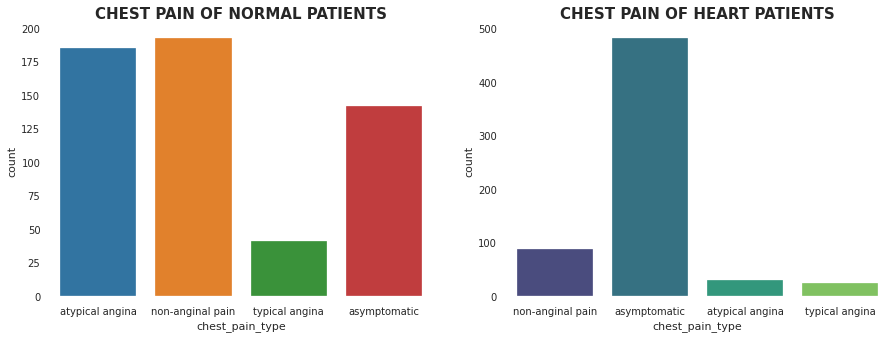

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("grey", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

## Distribution of Rest ECG

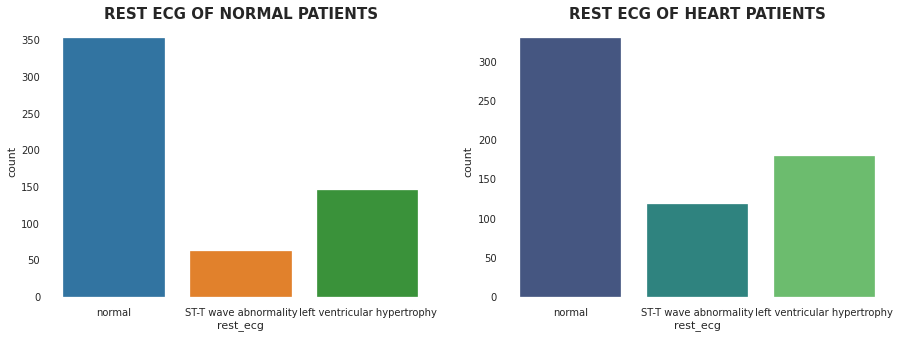

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

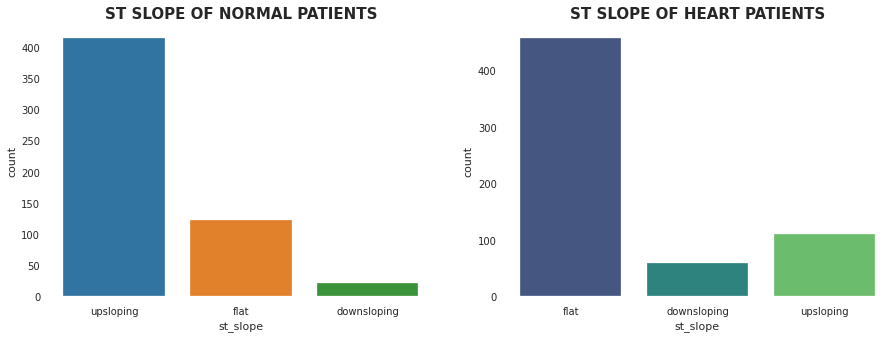

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

## Distribution of Max Heart Rate

In [ ]:
fig = px.histogram(dt, x="max_heart_rate_achieved", color="target", marginal="violin",
                   hover_data=dt.columns)
fig.show()

## Distribution of Resting Blood Pressure

In [ ]:
fig = px.histogram(dt, x="resting_blood_pressure", color="target", marginal="violin",
                   hover_data=dt.columns)
fig.show()

## Distribution of Cholesterol

In [ ]:
fig = px.histogram(dt, x="cholesterol", color="target", marginal="violin",
                   hover_data=dt.columns)
fig.show()

## Distribution of Numerical features

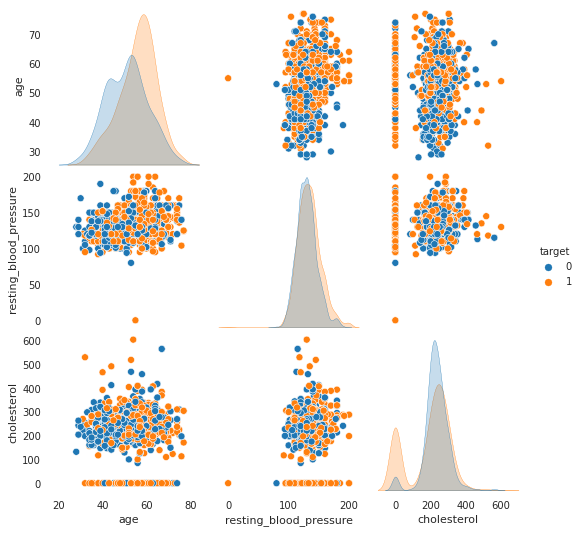

In [ ]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )
#to know how age chances of heart disease increases

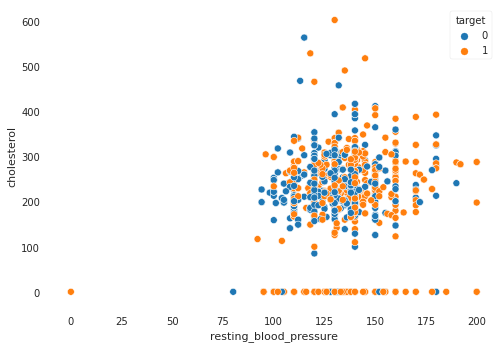

In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)
#to check misiing entries so that we can remove those outliners

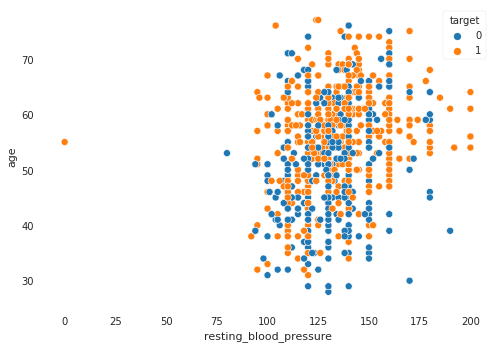

In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

# **Removal of Outlier**

In [ ]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [ ]:
dt_numeric

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0      40                     140          289                      172
1      49                     160          180                      156
2      37                     130          283                       98
3      48                     138          214                      108
4      54                     150          195                      122
...   ...                     ...          ...                      ...
1185   45                     110          264                      132
1186   68                     144          193                      141
1187   57                     130          131                      115
1188   57                     130          236                      174
1189   38                     138          175                      173

[1189 rows x 4 columns]

In [ ]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

[[1.46626567 0.4281359  0.7752277  1.26430092]
 [0.5035987  1.51737007 0.29951621 0.63725935]
 [1.78715466 0.11648118 0.71606748 1.63576637]
 ...
 [0.35210527 0.11648118 0.78265797 0.96953469]
 [0.35210527 0.11648118 0.2526458  1.34268112]
 [1.68019167 0.31921249 0.34881639 1.30349102]]


In [ ]:
# Defining threshold for filtering outliers
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


In [ ]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [ ]:
# checking shape of dataset after outlier removal
dt.shape

(1172, 12)

In [ ]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()


age  resting_blood_pressure  ...  st_slope_flat  st_slope_upsloping
0   40                     140  ...              0                   1
1   49                     160  ...              1                   0
2   37                     130  ...              0                   1
3   48                     138  ...              1                   0
4   54                     150  ...              0                   1

[5 rows x 16 columns]

In [ ]:
# checking the shape of dataset
dt.shape

(1172, 16)

#**Segregating dataset & Checking Correlation**

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

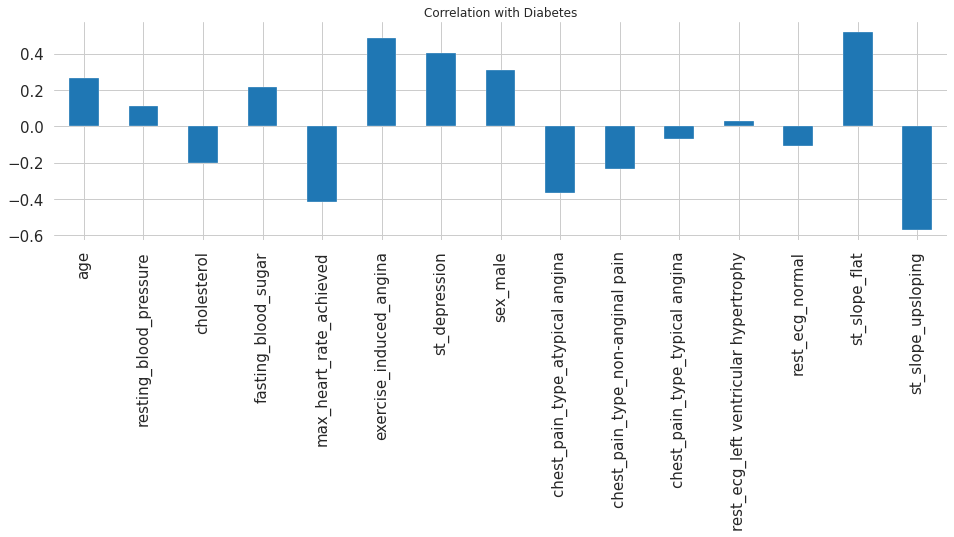

In [ ]:
#Correlation with Response Variable class
X.corrwith(y).plot.bar(figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15, rot = 90, grid = True)


# **Train Test Split & Feature normalization & building baseline model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
# checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    491
0    446
Name: target, dtype: int64
Distribution of traget variable in test set
1    123
0    112
Name: target, dtype: int64


In [ ]:
print('Training Set\n')
print(X_train.shape)
print(y_train.shape)

print('\nTest Set\n')
print(X_test.shape)
print(y_test.shape)

Training Set

(937, 15)
(937,)

Test Set

(235, 15)
(235,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#normalize all the numeric feature in the range of 0 to 1

scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train

age  resting_blood_pressure  ...  st_slope_flat  st_slope_upsloping
478   0.673469                0.193548  ...              0                   0
253   0.673469                0.354839  ...              0                   1
273   0.551020                0.516129  ...              1                   0
111   0.591837                0.623656  ...              1                   0
50    0.448980                0.408602  ...              1                   0
...        ...                     ...  ...            ...                 ...
1168  0.387755                0.408602  ...              0                   1
1095  0.551020                0.408602  ...              0                   1
760   0.469388                0.354839  ...              0                   1
1083  0.836735                0.731183  ...              1                   0
599   0.551020                0.301075  ...              0                   0

[937 rows x 15 columns]

In [ ]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test

age  resting_blood_pressure  ...  st_slope_flat  st_slope_upsloping
1024  0.693878                0.301075  ...              1                   0
182   0.469388                0.408602  ...              0                   1
785   0.346939                0.494624  ...              1                   0
924   0.591837                0.623656  ...              1                   0
780   0.612245                0.387097  ...              1                   0
...        ...                     ...  ...            ...                 ...
125   0.530612                0.301075  ...              0                   1
892   0.571429                0.301075  ...              0                   1
12    0.224490                0.301075  ...              0                   1
349   0.836735                0.483871  ...              1                   0
357   0.367347                0.247312  ...              1                   0

[235 rows x 15 columns]

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('DTC' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))


    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


    return results,msg

# **Ensembling with Stacked Classifier**

## Baseline models accuracy

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.851704 (0.051909)
LDA: 0.854907 (0.049415)
KNN7: 0.851659 (0.047773)
KNN5: 0.843079 (0.043544)
KNN9: 0.857001 (0.040182)
KNN11: 0.852745 (0.039732)
DTC: 0.865557 (0.018361)
NB: 0.845310 (0.048020)
SVM Linear: 0.852803 (0.052849)
SVM RBF: 0.852745 (0.044010)
AB: 0.853832 (0.028773)
GBM: 0.891158 (0.032571)
RF_Ent100: 0.934946 (0.035054)
RF_Gini100: 0.932807 (0.039193)
ET100: 0.923175 (0.033569)
ET500: 0.922123 (0.031882)
ET1000: 0.924251 (0.034750)
MLP: 0.870911 (0.038414)
SGD3000: 0.821791 (0.042217)
XGB_2000: 0.921082 (0.040058)
XGB_500: 0.926378 (0.033758)
XGB_100: 0.899703 (0.037175)
XGB_1000: 0.924274 (0.040144)


## Model building

### Random Forest Classifier (criterion = 'entropy')

In [ ]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [ ]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

### XGBoost (n_estimators=500)

In [ ]:
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### Decision Tree Classifier (CART)

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### Gradient boosting machine

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

## Model

In [ ]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    MLPClassifier(),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(9),
    ExtraTreesClassifier(n_estimators= 500),
    ExtraTreesClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 1000),
    xgboost.XGBClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 500),
    xgboost.XGBClassifier(n_estimators= 2000),
    xgboost.XGBClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),
    SVC(kernel='linear',gamma='auto',probability=True),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

In [ ]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=5,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [18]

model  0:     [RandomForestClassifier]
    fold  0:  [0.93617021]
    fold  1:  [0.88829787]
    fold  2:  [0.95187166]
    fold  3:  [0.94652406]
    fold  4:  [0.87700535]
    ----
    MEAN:     [0.91997383] + [0.03109458]
    FULL:     [0.91995731]

model  1:     [MLPClassifier]
    fold  0:  [0.89893617]
    fold  1:  [0.86170213]
    fold  2:  [0.85561497]
    fold  3:  [0.90909091]
    fold  4:  [0.84491979]
    ----
    MEAN:     [0.87405279] + [0.02525104]
    FULL:     [0.87406617]

model  2:     [RandomForestClassifier]
    fold  0:  [0.92553191]
    fold  1:  [0.89361702]
    fold  2:  [0.94652406]
    fold  3:  [0.94652406]
    fold  4:  [0.87165775]
    ----
    MEAN:     [0.91677096] + [0.02972728]
    FULL:     [0.91675560]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.88829787]
    fold  1:  [0.82978723]
    fold  2:  [0.85026738]
   

In [ ]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()

model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.90638298]


## Model Evaluation

Model  Accuracy  Precision  ...       ROC  Log_Loss  mathew_corrcoef
0  Stacked Classifier  0.906383   0.879699  ...  0.904181  3.233472         0.814595

[1 rows x 9 columns]

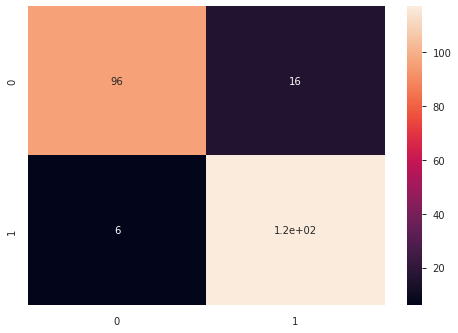

In [ ]:
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

mathew = matthews_corrcoef(y_test, y_pred)
model_results =pd.DataFrame([['Stacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

## Comparison with other Models

In [ ]:
data = {'Random Forest': y_pred_rfe,
                'MLP': y_pred_mlp,
                'KNN': y_pred_knn,
                'EXtra tree classifier': y_pred_et500,
                'XGB': y_pred_xgb,
                'SVC': y_pred_svc,
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada,
                'CART': y_pred_decc,
                'GBM': y_pred_gbm }

models = pd.DataFrame(data)

for column in models:
    CM=confusion_matrix(y_test,models[column])

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])

    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


Model  Accuracy  ...  Log_Loss  mathew_corrcoef
0      Stacked Classifier  0.906383  ...  3.233472         0.814595
1           Random Forest  0.893617  ...  3.674403         0.790580
2                     MLP  0.829787  ...  5.879036         0.662916
3                     KNN  0.808511  ...  6.613907         0.618029
4   EXtra tree classifier  0.906383  ...  3.233468         0.813662
5                     XGB  0.919149  ...  2.792538         0.838384
6                     SVC  0.825532  ...  6.026006         0.652539
7                     SGD  0.787234  ...  7.348730         0.583394
8                Adaboost  0.834043  ...  5.732052         0.668866
9                    CART  0.829787  ...  5.879016         0.658666
10                    GBM  0.851064  ...  5.144151         0.703286

[11 rows x 9 columns]

### ROC AUC Curve

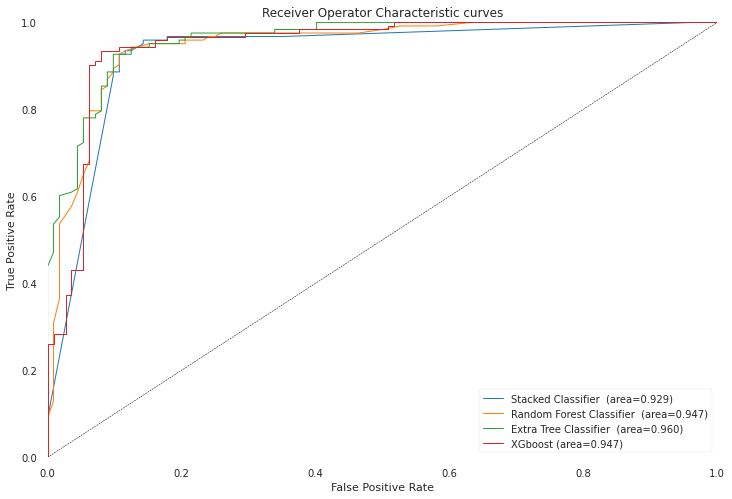

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,model.predict_proba(S_test),label='Stacked Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

As we can see highest average area under the curve (AUC) of 0.950 is attained by Extra Tree Classifier

### Precision Recall curve

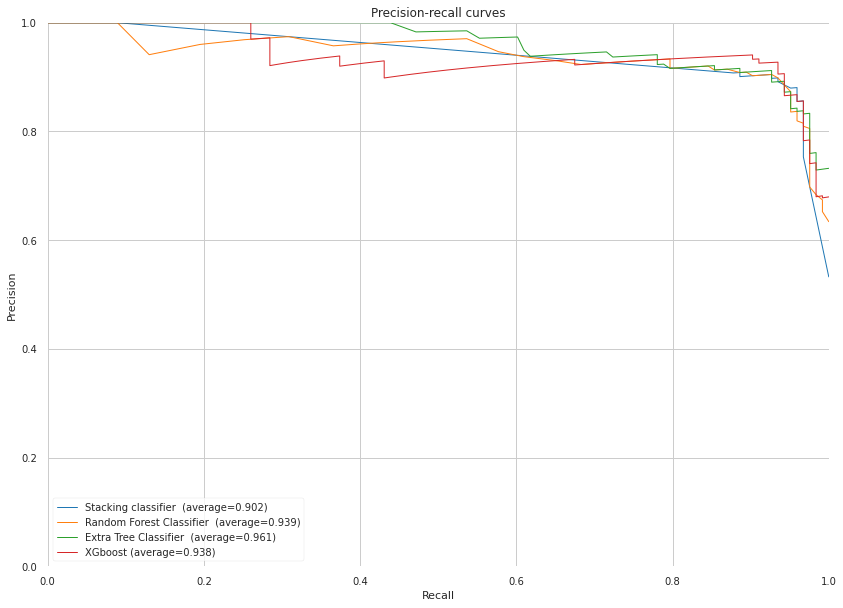

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,model.predict_proba(S_test),label='Stacking classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

#**Feature Selection**

In [ ]:
num_feats=11

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

11 selected features


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

11 selected features


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 15 features.
11 selected features


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

7 selected features


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='entropy'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

7 selected features


In [ ]:
# put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

Feature  Pearson  ...  LightGBM  Total
1                      st_slope_flat     True  ...      True      6
2                      st_depression     True  ...      True      6
3            max_heart_rate_achieved     True  ...      True      5
4            exercise_induced_angina     True  ...      True      5
5                        cholesterol     True  ...      True      5
6                                age     True  ...      True      5
7                 st_slope_upsloping     True  ...     False      4
8                           sex_male     True  ...     False      4
9   chest_pain_type_non-anginal pain     True  ...     False      4
10   chest_pain_type_atypical angina     True  ...     False      4
11            resting_blood_pressure    False  ...      True      2

[11 rows x 8 columns]

## Spliting Data

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target','resting_blood_pressure','sex_male','chest_pain_type_non-anginal pain','chest_pain_type_atypical angina'],axis=1)
y = dt['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_train

age  cholesterol  ...  st_slope_flat  st_slope_upsloping
478   0.673469     0.000000  ...              0                   0
253   0.673469     0.594705  ...              0                   1
273   0.551020     0.409369  ...              1                   0
111   0.591837     0.519348  ...              1                   0
50    0.448980     0.474542  ...              1                   0
...        ...          ...  ...            ...                 ...
1168  0.387755     0.515275  ...              0                   1
1095  0.551020     0.533605  ...              0                   1
760   0.469388     0.433809  ...              0                   1
1083  0.836735     0.476578  ...              1                   0
599   0.551020     0.460285  ...              0                   0

[937 rows x 11 columns]

In [ ]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_test

age  cholesterol  ...  st_slope_flat  st_slope_upsloping
1024  0.693878     0.572301  ...              1                   0
182   0.469388     0.456212  ...              0                   1
785   0.346939     0.480652  ...              1                   0
924   0.591837     0.562118  ...              1                   0
780   0.612245     0.527495  ...              1                   0
...        ...          ...  ...            ...                 ...
125   0.530612     0.501018  ...              0                   1
892   0.571429     0.480652  ...              0                   1
12    0.224490     0.415479  ...              0                   1
349   0.836735     0.000000  ...              1                   0
357   0.367347     0.000000  ...              1                   0

[235 rows x 11 columns]

# **Ensembling with Stacked Classifier with specific features**

## Baseline models accuracy

In [ ]:
import xgboost as xgb
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.822878 (0.047967)
LDA: 0.822867 (0.043305)
KNN7: 0.807904 (0.044339)
KNN5: 0.803660 (0.045820)
KNN9: 0.815374 (0.036848)
KNN11: 0.809037 (0.042388)
DTC: 0.872970 (0.030141)
NB: 0.822889 (0.042157)
SVM Linear: 0.815488 (0.045773)
SVM RBF: 0.797278 (0.049967)
AB: 0.816529 (0.036133)
GBM: 0.855937 (0.024759)
RF_Ent100: 0.922100 (0.026063)
RF_Gini100: 0.926378 (0.027473)
ET100: 0.917845 (0.024704)
ET500: 0.919984 (0.026966)
ET1000: 0.922123 (0.025580)
MLP: 0.830302 (0.037928)
SGD3000: 0.809003 (0.069101)
XGB_2000: 0.901830 (0.041681)
XGB_500: 0.887943 (0.039344)
XGB_100: 0.850583 (0.028564)
XGB_1000: 0.906074 (0.044921)


## Model building

### Random Forest Classifier (criterion = 'entropy')

In [ ]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [ ]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

### XGBoost (n_estimators=1000)

In [ ]:
xgb = xgb.XGBClassifier(n_estimators= 1000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### Decision Tree Classifier (CART)

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### Gradient boosting machine

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

## Model with specific features

In [ ]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    MLPClassifier(),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(9),
    ExtraTreesClassifier(n_estimators= 500),
    ExtraTreesClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 1000),
    xgboost.XGBClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 500),
    xgboost.XGBClassifier(n_estimators= 2000),
    xgboost.XGBClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),

    SVC(kernel='linear',gamma='auto',probability=True),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

In [ ]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=5,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [18]

model  0:     [RandomForestClassifier]
    fold  0:  [0.87234043]
    fold  1:  [0.87234043]
    fold  2:  [0.92513369]
    fold  3:  [0.93582888]
    fold  4:  [0.85026738]
    ----
    MEAN:     [0.89118216] + [0.03325681]
    FULL:     [0.89114194]

model  1:     [MLPClassifier]
    fold  0:  [0.86702128]
    fold  1:  [0.81382979]
    fold  2:  [0.86631016]
    fold  3:  [0.85026738]
    fold  4:  [0.80213904]
    ----
    MEAN:     [0.83991353] + [0.02700403]
    FULL:     [0.83991462]

model  2:     [RandomForestClassifier]
    fold  0:  [0.88297872]
    fold  1:  [0.89361702]
    fold  2:  [0.92513369]
    fold  3:  [0.93048128]
    fold  4:  [0.85026738]
    ----
    MEAN:     [0.89649562] + [0.02933669]
    FULL:     [0.89647812]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.86702128]
    fold  1:  [0.83510638]
    fold  2:  [0.83422460]
   

In [ ]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()

model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.89361702]


## Model Evaluation

Model  Accuracy  ...  Log_Loss  mathew_corrcoef
0  Stacked Classifier 2  0.893617  ...  3.674392         0.787582

[1 rows x 9 columns]

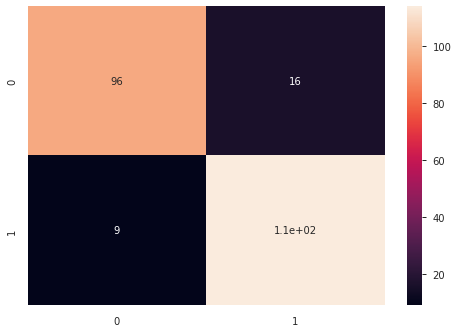

In [ ]:
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

mathew = matthews_corrcoef(y_test, y_pred)
model_results =pd.DataFrame([['Stacked Classifier 2',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

## Comparison with other Models

In [ ]:
data = {'Random Forest 2': y_pred_rfe,
                'MLP 2': y_pred_mlp,
                'KNN 2': y_pred_knn,
                'Extra tree classifier 2': y_pred_et500,
                'XGB 2': y_pred_xgb,
                'SVC 2': y_pred_svc,
                'SGD 2': y_pred_sgd,
                'Adaboost 2': y_pred_ada,
                'CART 2': y_pred_decc,
                'GBM 2': y_pred_gbm }

models = pd.DataFrame(data)

for column in models:
    CM=confusion_matrix(y_test,models[column])

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])

    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

Model  Accuracy  ...  Log_Loss  mathew_corrcoef
0      Stacked Classifier 2  0.893617  ...  3.674392         0.787582
1           Random Forest 2  0.889362  ...  3.821376         0.781313
2                     MLP 2  0.825532  ...  6.025999         0.650971
3                     KNN 2  0.812766  ...  6.466920         0.624631
4   Extra tree classifier 2  0.902128  ...  3.380442         0.804719
5                     XGB 2  0.897872  ...  3.527422         0.797405
6                     SVC 2  0.808511  ...  6.613914         0.620202
7                     SGD 2  0.770213  ...  7.936614         0.560361
8                Adaboost 2  0.825532  ...  6.025989         0.650092
9                    CART 2  0.880851  ...  4.115323         0.763024
10                    GBM 2  0.859574  ...  4.850194         0.719033

[11 rows x 9 columns]

### ROC AUC Curve

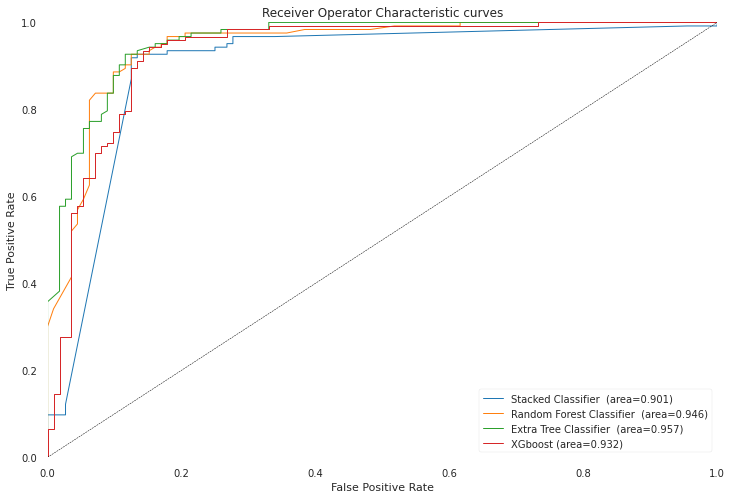

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,model.predict_proba(S_test),label='Stacked Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

### Precision Recall curve

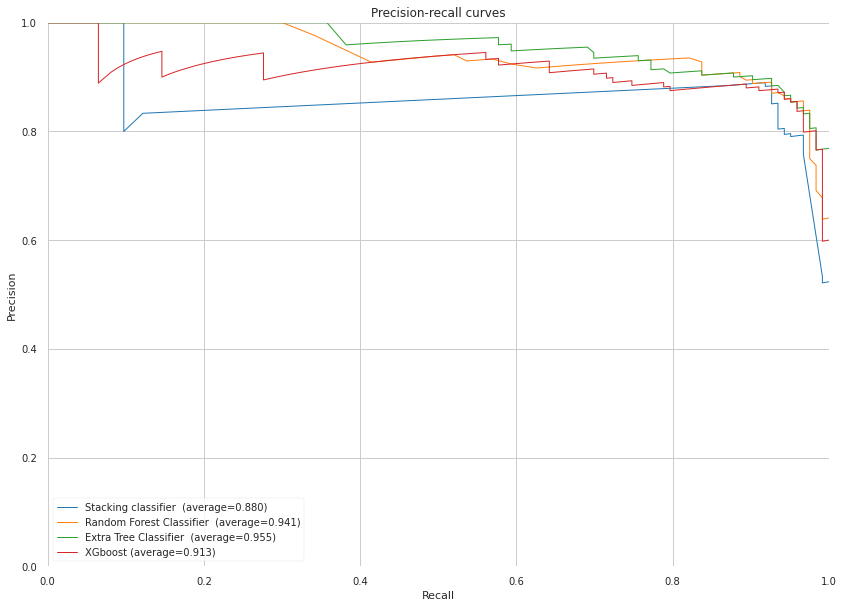

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,model.predict_proba(S_test),label='Stacking classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

#**Feature Importance**

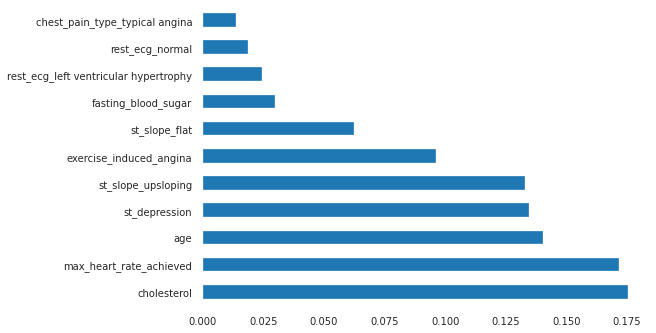

In [ ]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')